### This program uses Artificial recurrent neural network LSTM to predict closing stock price

In [1]:
#importing the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
ticker = 'MSFT'

In [3]:
#getting the stock quote
df = web.DataReader(ticker,data_source='yahoo',start='2012-01-01',end='2022-10-24')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,26.959999,26.389999,26.549999,26.770000,64731500.0,21.527195
2012-01-04,27.469999,26.780001,26.820000,27.400000,80516100.0,22.033808
2012-01-05,27.730000,27.290001,27.379999,27.680000,56081400.0,22.258972
2012-01-06,28.190001,27.530001,27.530001,28.110001,99455500.0,22.604765
2012-01-09,28.100000,27.719999,28.049999,27.740000,59706800.0,22.307220
...,...,...,...,...,...,...
2022-10-18,243.929993,235.369995,243.240005,238.500000,26329600.0,238.500000
2022-10-19,239.610001,234.289993,237.039993,236.479996,19985700.0,236.479996
2022-10-20,241.309998,234.869995,235.770004,236.149994,21811000.0,236.149994


In [4]:
#Getting the number of rows and columns in the dataset
df.shape

(2721, 6)

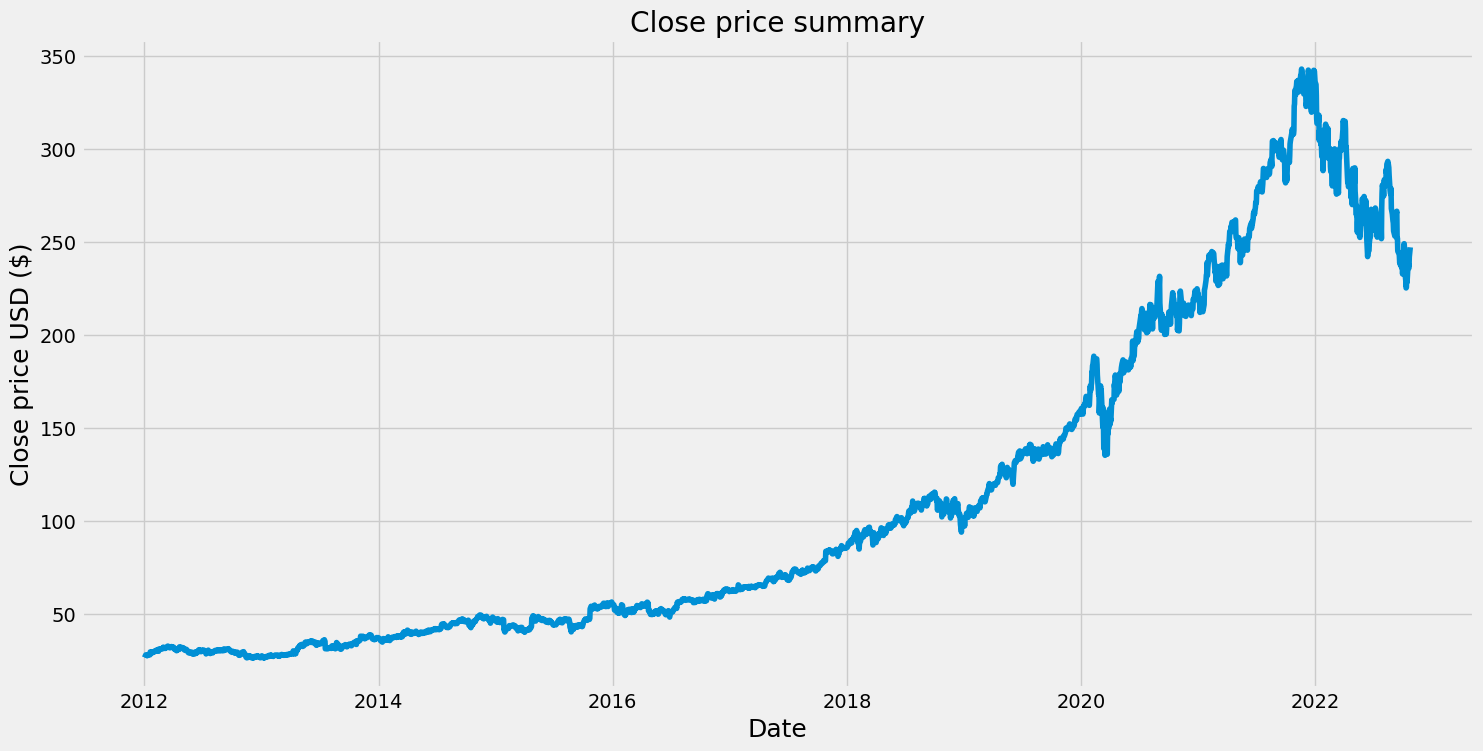

In [5]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close price summary')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD ($)',fontsize=18)
plt.show()

In [6]:
#create a new dataframe with just the close column
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#getting the number of rows to train the model on 
training_data_len = math.ceil(len(dataset)*0.8)

training_data_len

2177

In [7]:
#Scaling the data
scalar = MinMaxScaler(feature_range=(0,1))
scaled_data = scalar.fit_transform(dataset)
scaled_data

array([[0.00126286],
       [0.00325187],
       [0.00413588],
       ...,
       [0.66230979],
       [0.68115806],
       [0.69735433]])

In [8]:
#Create the training dataset
#create a scaled dataset
train_data = scaled_data[0:training_data_len, :]
#split the data into X_train and y_train datasets
X_train=[]
y_train=[]

for i in range(60,len(train_data)):
    X_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i <=60:
        print(X_train)
        print(y_train)
        print()

[array([0.00126286, 0.00325187, 0.00413588, 0.00549346, 0.00432531,
       0.00464103, 0.00426217, 0.00514617, 0.00593547, 0.00596704,
       0.00587232, 0.00552504, 0.01054492, 0.01060807, 0.00937677,
       0.01007135, 0.00988192, 0.00902948, 0.01022921, 0.00997664,
       0.01111321, 0.01130265, 0.01221822, 0.01209194, 0.01256551,
       0.01354423, 0.01389152, 0.01303908, 0.01329166, 0.01224979,
       0.01161836, 0.01553325, 0.01540696, 0.01600682, 0.0154701 ,
       0.01578582, 0.0161331 , 0.01572267, 0.0173644 , 0.01695397,
       0.01869041, 0.01802741, 0.01714339, 0.01638568, 0.01726968,
       0.0178064 , 0.01774326, 0.01790112, 0.01989012, 0.02020585,
       0.02045841, 0.01966912, 0.01840626, 0.01774326, 0.01749068,
       0.01777483, 0.0178064 , 0.01963756, 0.01941656, 0.01837469])]
[0.018153685590104426]



In [9]:
train_data

array([[0.00126286],
       [0.00325187],
       [0.00413588],
       ...,
       [0.59139992],
       [0.60017683],
       [0.61495233]])

In [10]:
#Convert the X_train and y_train to numpy array
X_train,y_train = np.array(X_train),np.array(y_train)

In [11]:
X_train.shape

(2117, 60)

In [12]:
#reshape the data as the LSTM expects the data to be in 3 dimensional
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(2117, 60, 1)

### Building the LSTM model

In [13]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

2022-10-24 14:30:50.857253: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [15]:
model.fit(X_train,y_train,batch_size=1,epochs=4)

Epoch 1/4
2117/2117 [==============================] - 30s 13ms/step - loss: 5.1844e-04
Epoch 2/4
2117/2117 [==============================] - 28s 13ms/step - loss: 2.0685e-04
Epoch 3/4
2117/2117 [==============================] - 28s 13ms/step - loss: 2.0016e-04
Epoch 4/4
2117/2117 [==============================] - 28s 13ms/step - loss: 1.2099e-04


In [16]:
#Creating the testing dataset
#Create a new array containing scaled value from index 2117 to 2721
test_data = scaled_data[training_data_len-60:,:]
#create the dataset X_test,y_test
X_test=[]
y_test=dataset[training_data_len:,:]

for i in range(60,len(test_data)):
    X_test.append(test_data[i-60:i,0])

In [17]:
#CONVERT THE DATA INTO A np.array
X_test = np.array(X_test)

In [18]:
X_test.shape

(544, 60)

In [19]:
#Reshaping the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(544, 60, 1)

In [20]:
#Getting the model predicted price value
predictions = model.predict(X_test)

17/17 [==============================] - 1s 10ms/step


In [21]:
predictions=scalar.inverse_transform(predictions)

In [22]:
#Getting the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

1.4079084115869858

/var/folders/r5/3bmqd5d91l7d11d1x39m82v00000gn/T/ipykernel_7769/2628329274.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


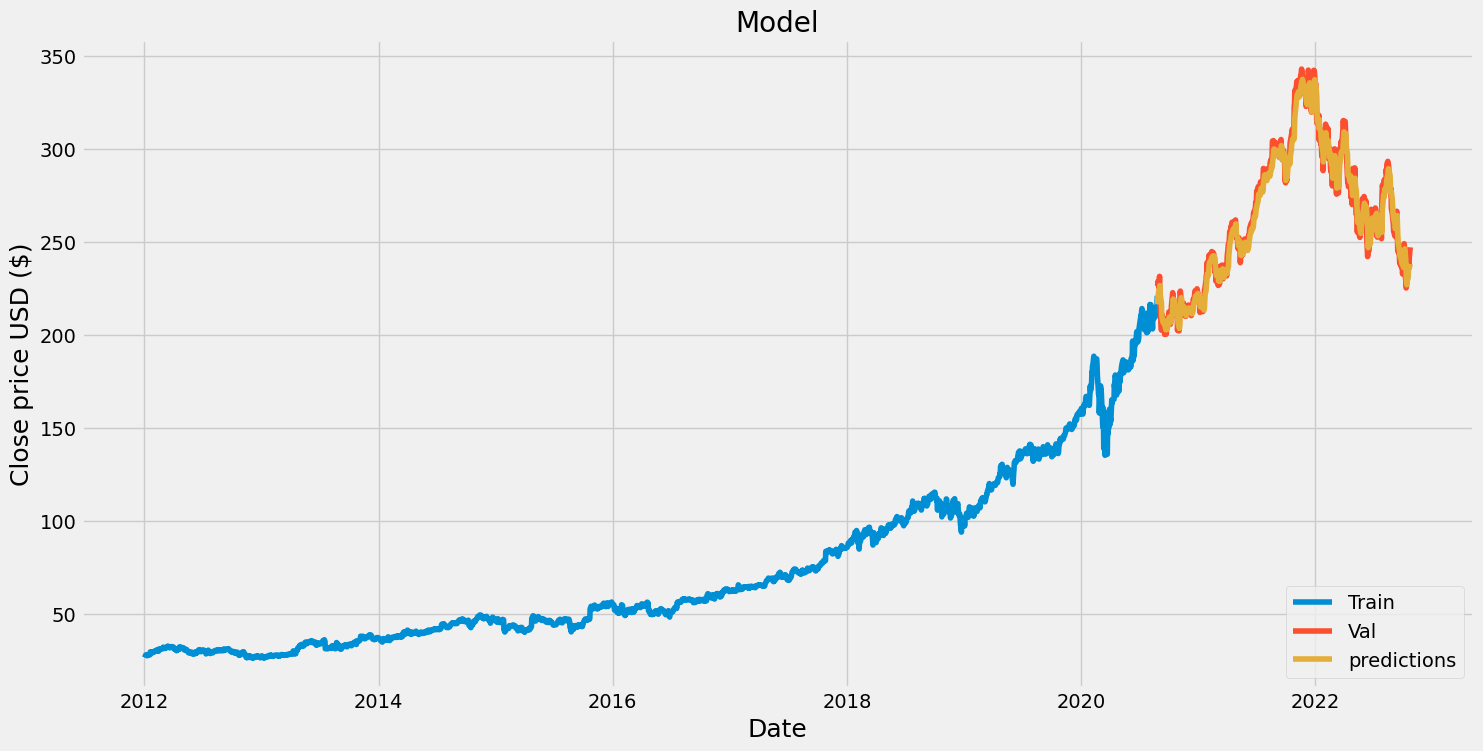

In [23]:
#plot
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions
#visualize the model
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Val','predictions'],loc='lower right')
plt.show()

In [24]:
#Show the valid and predicted price
valid

,Close,predictions
Date,,
2020-08-27,226.580002,216.592712
2020-08-28,228.910004,220.689346
2020-08-31,225.529999,224.090759
2020-09-01,227.270004,224.335587
2020-09-02,231.649994,224.655182
...,...,...
2022-10-18,238.500000,233.820969
2022-10-19,236.479996,236.486282
2022-10-20,236.149994,236.773407


In [25]:
#Get the quote 
Stock_quote = web.DataReader(ticker,data_source='yahoo',start='2020-01-01',end='2022-10-24')
#Create a new dataframe
new_df = Stock_quote.filter(['Close'])
#get the last 60 day closing values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#scale the data to values between 0 and 1
last_60_days_scaled = scalar.transform(last_60_days)
#create an empty list
X_test = []
#append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test dataset to numpy array
X_test = np.array(X_test)
#Reshape the data to 3D
X_test == np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#get the predicted price
pred_price = model.predict(X_test)
#Undo scaling
pred_price = scalar.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 1s 525ms/step
[[241.90018]]


In [26]:
from datetime import date

today = date.today()
print("Today's date:", today)


Today's date: 2022-10-24


In [27]:
Stock_quote2 = web.DataReader(ticker,data_source='yahoo',start=today,end=today)
print(Stock_quote2['Close'])

Date
2022-10-24    247.25
Name: Close, dtype: float64


In [28]:
Price_difference = pred_price[0]-Stock_quote2['Close']
print('Based on this analysis, there is a price difference of ${:.2f} from the predicted cost to the actual cost.'.format(Price_difference[0]))

Based on this analysis, there is a price difference of $-5.35 from the predicted cost to the actual cost.
